# D7059E

*   Jacob Yousif
*   Donato Scarano


## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install --upgrade threadpoolctl 

In [3]:
%%capture
!pip install umap-learn wordcloud

In [4]:
%%capture
!pip install pyLDAvis==2.1.2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer, cohen_kappa_score
import pyLDAvis

## Data Loading

In [6]:
df = pd.read_parquet('datasets/Vectorized15SentenceSegmentsWithEmbeddings.parquet')
main = df.copy()

In [7]:
df.dropna(inplace=True)

In [8]:
print('Length of the dataframe is:', str(len(df)))

Length of the dataframe is: 28836


In [9]:
print(f"Does the DataFrame have any NaN values? {df.isna().sum().sum()}")

Does the DataFrame have any NaN values? 0


In [10]:
has_nan = df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? False


In [11]:
plots_dir = '5_plots/'
plots_dir = 'v_3/'

## Topic Modelling

In [12]:
df.head()

Book       Author    Genre  Publish-Year  Average-Rating  \
0  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
1  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
2  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
3  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
4  Sense And Sensibility  Jane Austen  Romance          1811            4.08   

   AuthorCode  AverageWordLength  AverageSentenceLengthByWord  \
0           0           6.315789                    26.800000   
1           0           6.294821                    37.933333   
2           0           6.331492                    24.733333   
3           0           6.470852                    29.933333   
4           0           6.735849                    20.933333   

   AverageSyllablePerWord  SpecialCharactersCount  ...  FleschReadingEase  \
0                1.968586                0.000439  ...              64.44   
1                1.940711                0.001916  ...              54.39   
2                1.977901                0.004239  ...              68.60   
3                2.048673                0.002263  ...              58.21   
4                2.194969                0.003071  ...              60.04   

   FleschKincaidGradeLevel  DaleChallReadability  GunningFog  \
0                     10.1             25.760267       12.13   
1                     14.0             28.428606       16.07   
2                      8.5             25.257014       10.82   
3                     10.5             27.036251       12.30   
4                      9.8             24.674952       12.17   

   AverageSentenceLengthByChar  Sentiment  \
0                   151.000000   0.147207   
1                   207.800000   0.119557   
2                   140.600000   0.124122   
3                   175.800000   0.247345   
4                   129.333333   0.169444   

                                                Text  \
0  CHAPTER I. The family of Dashwood had long bee...   
1  By his own marriage, likewise, which happened ...   
2  He survived his uncle no longer; and ten thous...   
3  “Yes, he would give them three thousand pounds...   
4  Marianne’s abilities were, in many respects, q...   

                                            Pre-Text  \
0  chapter family dashwood long settled sussex es...   
1  marriage likewise happened soon afterwards add...   
2  survived uncle longer ten thousand pounds incl...   
3  yes would give three thousand pounds would lib...   
4  mariannes abilities many respects quite equal ...   

                                     Lemmatized-Text  \
0  chapter family dashwood long settle sussex est...   
1  marriage likewise happen soon afterwards add w...   
2  survive uncle longer ten thousand pound includ...   
3  yes would give three thousand pound would libe...   
4  mariannes ability many respect quite equal eli...   

                                          Embeddings  
0  [0.057984795, 0.08722327, 0.07592374, -0.10736...  
1  [0.05164058, 0.04184325, 0.031200934, -0.10265...  
2  [0.039218742, 0.041709043, 0.036968317, -0.117...  
3  [0.087891296, 0.026678447, 0.04497105, -0.1026...  
4  [0.061428584, 0.092939295, 0.04303288, -0.0906...  

[5 rows x 31 columns]

In [13]:
df.describe()

Publish-Year  Average-Rating    AuthorCode  AverageWordLength  \
count  28836.000000    28836.000000  28836.000000       28836.000000   
mean    1873.400090        3.914407      7.883375           5.625329   
std       25.805778        0.252139      4.378727           0.636701   
min     1811.000000        2.780000      0.000000           2.000000   
25%     1861.000000        3.790000      4.000000           5.204145   
50%     1871.000000        3.960000      8.000000           5.681523   
75%     1897.000000        4.090000     12.000000           6.090278   
max     1924.000000        4.290000     15.000000           8.220000   

       AverageSentenceLengthByWord  AverageSyllablePerWord  \
count                 28836.000000            28836.000000   
mean                     20.660614                1.711583   
std                       8.549998                0.188764   
min                       1.133333                1.000000   
25%                      14.866667                1.577465   
50%                      19.733333                1.705165   
75%                      25.400000                1.837838   
max                     331.600000                2.636364   

       SpecialCharactersCount  PunctuationCount  FunctionalWordsCount  \
count            28836.000000      28836.000000          28836.000000   
mean                 0.003154          0.031006              0.120095   
std                  0.004908          0.014442              0.009961   
min                  0.000000          0.000000              0.000000   
25%                  0.000724          0.024609              0.114062   
50%                  0.001927          0.028743              0.120193   
75%                  0.004005          0.034238              0.126251   
max                  0.294118          0.394737              0.183007   

       TypeTokenRatio  ...  YulesCharacteristicK  SimpsonsIndex  \
count    28836.000000  ...          28836.000000   28836.000000   
mean         0.524275  ...            753.483003       0.924583   
std          0.056855  ...             94.686443       0.009854   
min          0.206099  ...            470.209710       0.462451   
25%          0.486760  ...            732.407656       0.922947   
50%          0.522638  ...            750.537807       0.924897   
75%          0.560284  ...            769.976645       0.926711   
max          0.909091  ...           5141.776938       0.952819   

       BrunetsMeasureW  ShannonEntropy  FleschReadingEase  \
count     28836.000000    28836.000000       28836.000000   
mean          5.590406        4.235887          76.280151   
std           0.609058        0.107138          11.601794   
min           2.149114        1.502394        -172.770000   
25%           5.179159        4.181034          69.210000   
50%           5.550824        4.227413          77.470000   
75%           5.949489        4.282520          84.270000   
max           9.465489        4.935651         120.210000   

       FleschKincaidGradeLevel  DaleChallReadability    GunningFog  \
count             28836.000000          28836.000000  28836.000000   
mean                  7.148925             23.931230      9.377539   
std                   3.241692              2.361554      3.312991   
min                  -3.100000             17.935973      0.400000   
25%                   4.900000             22.343997      7.047500   
50%                   6.700000             23.657948      8.900000   
75%                   8.900000             25.220282     11.180000   
max                 101.300000            107.673633    104.650000   

       AverageSentenceLengthByChar     Sentiment  
count                 28836.000000  28836.000000  
mean                    114.316212      0.079517  
std                      48.676561      0.111501  
min                       1.600000     -1.000000  
25%                      81.600000      0.012537  
50%                     108.666667      0.078928  

In [14]:
df.columns

Index(['Book', 'Author', 'Genre', 'Publish-Year', 'Average-Rating',
       'AuthorCode', 'AverageWordLength', 'AverageSentenceLengthByWord',
       'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
       'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
       'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
       'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
       'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
       'AverageSentenceLengthByChar', 'Sentiment', 'Text', 'Pre-Text',
       'Lemmatized-Text', 'Embeddings'],
      dtype='object')

In [15]:
embeddings_matrix = np.stack(df['Embeddings'].values)
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud

scaler = MinMaxScaler()
scaled_embeddings = scaler.fit_transform(reduced_embeddings)


lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(scaled_embeddings)

LatentDirichletAllocation(n_components=5, random_state=0)

In [17]:
topic_distribution = lda.transform(scaled_embeddings)

In [18]:
cluster_labels = np.argmax(topic_distribution, axis=1)

In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_embeddings, cluster_labels)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : -0.0052519594


In [20]:
print(topic_distribution)

[[0.00965154 0.22484176 0.13216889 0.5145958  0.11874203]
 [0.00944491 0.25429928 0.2115629  0.42540422 0.09928869]
 [0.00974878 0.2927435  0.16277397 0.44938058 0.08535316]
 ...
 [0.00953578 0.04051696 0.20638384 0.4650576  0.27850574]
 [0.00934429 0.16515937 0.25339282 0.456867   0.11523645]
 [0.96261346 0.00934204 0.00934204 0.00936017 0.00934224]]


In [21]:
print("Perplexity:", lda.perplexity(scaled_embeddings))

Perplexity: 64.76059131513631


In [22]:
pca = PCA(n_components=10)
reduced_embeddings  = pca.fit_transform(scaled_embeddings)

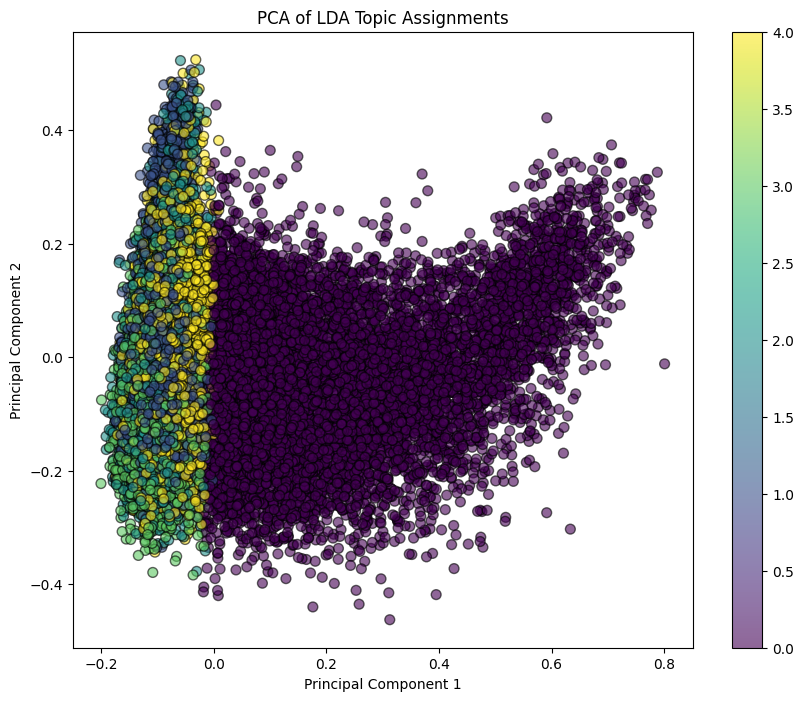

In [23]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.colorbar()
plt.title('PCA of LDA Topic Assignments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

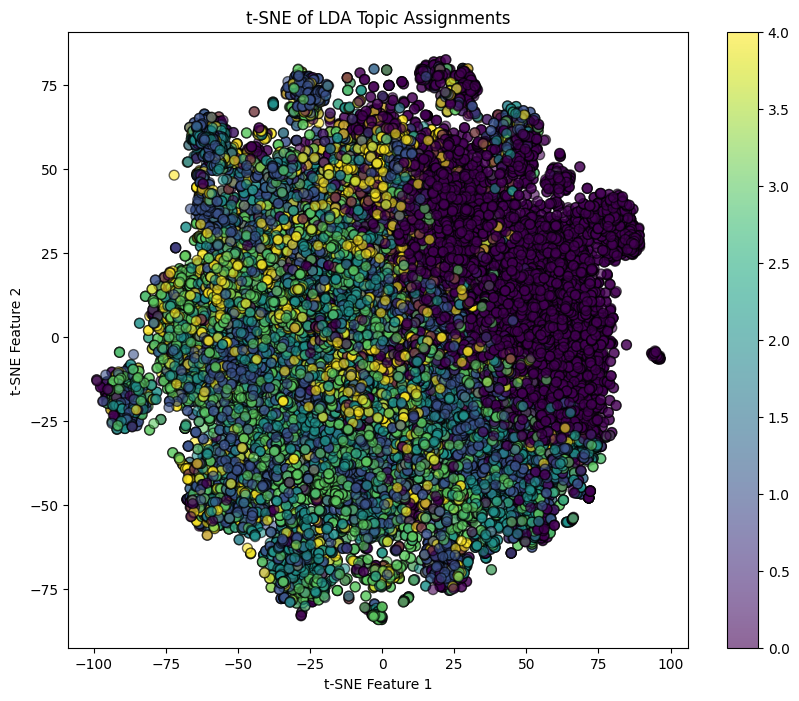

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
reduced_data_tsne = tsne.fit_transform(scaled_embeddings)


plt.figure(figsize=(10, 8))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.colorbar()
plt.title('t-SNE of LDA Topic Assignments')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_labels = gmm.fit_predict(reduced_embeddings)


gmm_silhouette = silhouette_score(reduced_embeddings, gmm_labels)
print("Silhouette Score for GMM:", gmm_silhouette)

Silhouette Score for GMM: 0.07131329


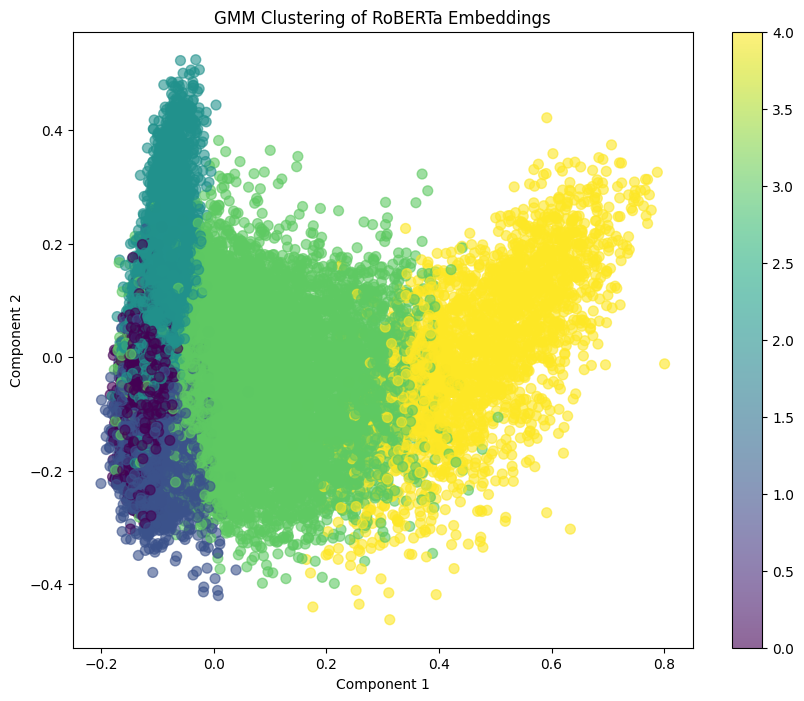

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.title('GMM Clustering of RoBERTa Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [27]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(reduced_embeddings)

In [28]:
filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_embeddings = reduced_embeddings[dbscan_labels != -1]

In [29]:
if len(np.unique(filtered_labels)) > 1: 
    dbscan_silhouette = silhouette_score(filtered_embeddings, filtered_labels)
    print("Silhouette Score for DBSCAN:", dbscan_silhouette)
else:
    print("Not enough clusters for silhouette score. Adjust DBSCAN parameters.")

Not enough clusters for silhouette score. Adjust DBSCAN parameters.


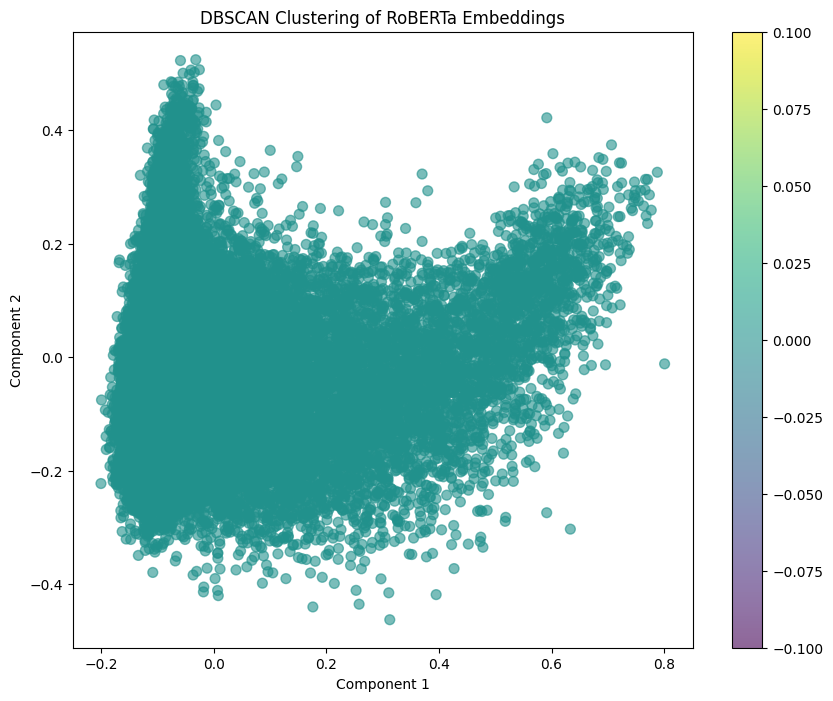

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.title('DBSCAN Clustering of RoBERTa Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

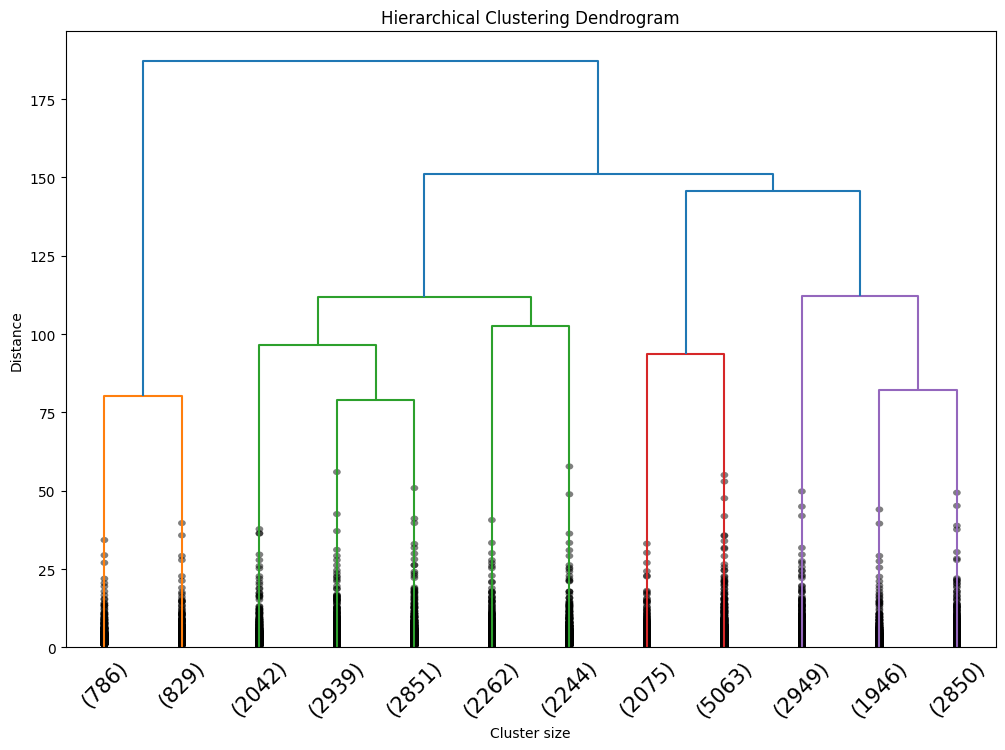

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


scaler = StandardScaler()
data_scaled = scaler.fit_transform(reduced_embeddings)


Z = linkage(data_scaled, 'ward')


plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [32]:
df['Topic'] = topic_distribution.argmax(axis=1)

In [33]:
print(df['Topic'].value_counts())

Topic
0    8833
1    6105
2    5330
3    5204
4    3364
Name: count, dtype: int64


In [34]:
topics = []

for topic in range(5):
    print(f"\nTopic {topic} samples:")
    num_entries = df[df['Topic'] == topic].shape[0]
    if num_entries == 0:
        print("No samples available.")
        continue
    sample_size = min(5, num_entries)
    target = df[df['Topic'] == topic]['Text'].sample(sample_size).values
    print(target)
    topics.append(target)


Topic 0 samples:
['I feel myself better, purer. I feel that I have a heart, and that there is a great deal of good in me. Those sweet, loving eyes! When she said: ‘Indeed I do....’ “Well, what then? Oh, nothing. It’s good for me, and good for her.” And he began wondering where to finish the evening. He passed in review of the places he might go to. “Club? a game of bezique, champagne with Ignatov? No, I’m not going. _Château des Fleurs_; there I shall find Oblonsky, songs, the cancan. No, I’m sick of it. That’s why I like the Shtcherbatskys’, that I’m growing better. I’ll go home.” He went straight to his room at Dussots’ Hotel, ordered supper, and then undressed, and as soon as his head touched the pillow, fell into a sound sleep. Chapter 17 Next day at eleven o’clock in the morning Vronsky drove to the station of the Petersburg railway to meet his mother, and the first person he came across on the great flight of steps was Oblonsky, who was expecting his sister by the same train.'
 

In [35]:
df['DominantTopic'] = np.argmax(topic_distribution, axis=1)
df['TopicProbability'] = np.max(topic_distribution, axis=1)

In [36]:
academic_palette = sns.color_palette('Set1', n_colors=df['Topic'].nunique())

In [37]:
mean_topic_probs = topic_distribution.mean(axis=0)
print("Mean Topic Probabilities:", mean_topic_probs)

Mean Topic Probabilities: [0.29681846 0.18755488 0.18566152 0.18863969 0.14132607]


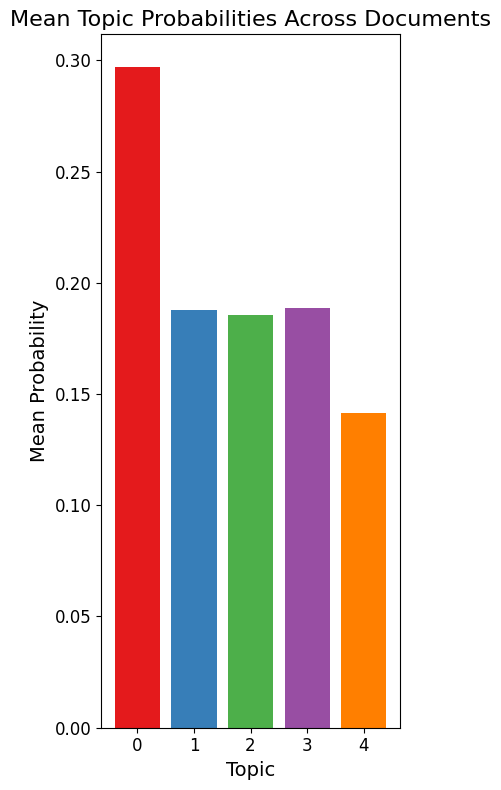

In [38]:
plt.figure(figsize=(4, 8)) 
plt.bar(range(lda.n_components), mean_topic_probs, color=academic_palette)
plt.xlabel('Topic', fontsize=14) 
plt.ylabel('Mean Probability', fontsize=14)  
plt.title('Mean Topic Probabilities Across Documents', fontsize=16)  
plt.xticks(range(lda.n_components), fontsize=12)  # 
plt.yticks(fontsize=12)  
plt.tight_layout()
plt.savefig(f'{plots_dir}mean_topic_probabilities_across_documents.png', bbox_inches='tight')
plt.show()

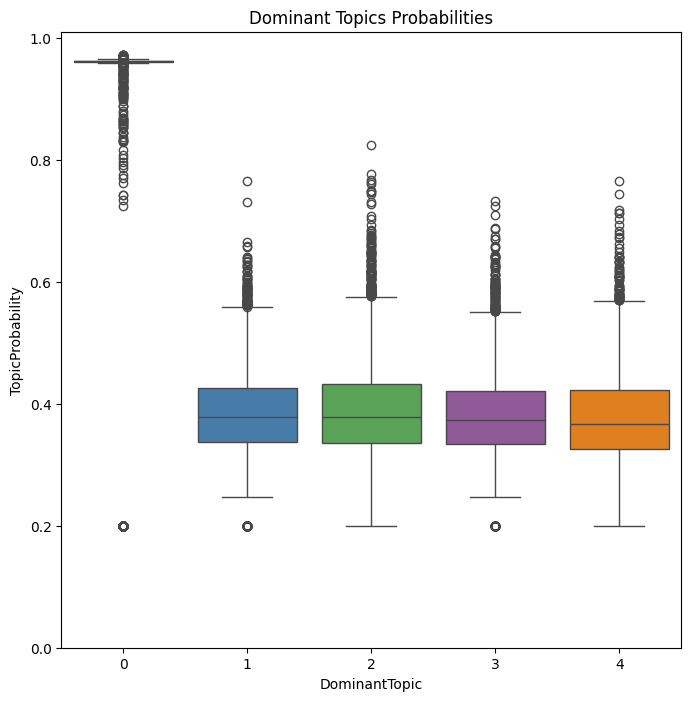

In [39]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.boxplot(x='DominantTopic', y='TopicProbability', data=df, palette=academic_palette)
plt.title('Dominant Topics Probabilities')
plt.ylim(bottom=0)
plt.savefig(f'{plots_dir}dominant_topics_probabilities.png', bbox_inches='tight')
plt.show()

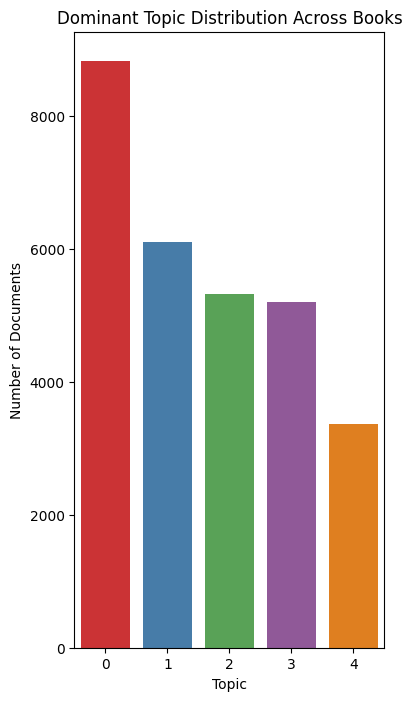

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 8))
sns.countplot(data=df, x='DominantTopic', palette=academic_palette)
plt.title('Dominant Topic Distribution Across Books')
plt.ylabel('Number of Documents')
plt.xlabel('Topic')
plt.savefig(f'{plots_dir}dominant_topics_distribution.png', bbox_inches='tight')
plt.show()

In [41]:
topic_counts = df['DominantTopic'].value_counts(normalize=True)
print("\nTopic Distribution:")
print(topic_counts)


Topic Distribution:
DominantTopic
0    0.306318
1    0.211715
2    0.184838
3    0.180469
4    0.116660
Name: proportion, dtype: float64


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
def get_topic_keywords(lda_model, num_words=10):
    for i, topic in enumerate(lda_model.components_):
        top_features_indices = topic.argsort()[-num_words:][::-1]
        top_features_weights = topic[top_features_indices]
        print(f"Topic {i}:")
        print([(i, round(weight, 2)) for i, weight in zip(top_features_indices, top_features_weights)])

In [44]:
get_topic_keywords(lda)

Topic 0:
[(20, 3096.89), (38, 3079.07), (44, 3053.83), (42, 3052.57), (0, 3044.64), (21, 3031.52), (19, 3023.55), (7, 2998.95), (13, 2997.35), (30, 2983.08)]
Topic 1:
[(20, 2814.4), (38, 2785.11), (42, 2763.0), (44, 2755.71), (19, 2750.25), (21, 2742.05), (7, 2741.29), (1, 2725.88), (30, 2713.01), (13, 2711.4)]
Topic 2:
[(20, 2835.03), (38, 2801.23), (42, 2795.46), (44, 2768.23), (7, 2761.32), (19, 2760.53), (21, 2756.59), (1, 2744.21), (12, 2730.19), (30, 2728.33)]
Topic 3:
[(20, 2859.33), (38, 2830.16), (42, 2807.52), (19, 2796.18), (44, 2793.01), (7, 2787.9), (21, 2786.77), (1, 2760.29), (30, 2757.46), (13, 2747.75)]
Topic 4:
[(20, 2806.63), (38, 2756.68), (19, 2749.68), (42, 2746.83), (44, 2728.81), (21, 2719.1), (7, 2714.22), (1, 2711.37), (13, 2710.1), (12, 2698.53)]


In [45]:
from textblob import TextBlob

In [46]:
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Topic'] = df['Topic'].astype('category')

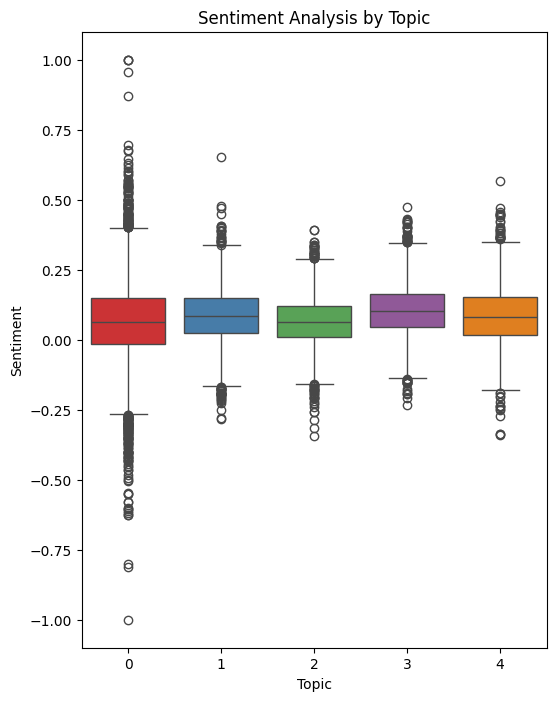

In [47]:
#sns.set_palette(academic_palette)

plt.figure(figsize=(6, 8))
val = sorted(df['Topic'].unique())
topic_colors = {str(topic): color for topic, color in zip(val, academic_palette)}

sns.boxplot(x='Topic', y='Sentiment', data=df, palette=topic_colors)
plt.title('Sentiment Analysis by Topic')
plt.savefig(f'{plots_dir}dominant_topics_sentiment_analysis.png', bbox_inches='tight')
plt.show()

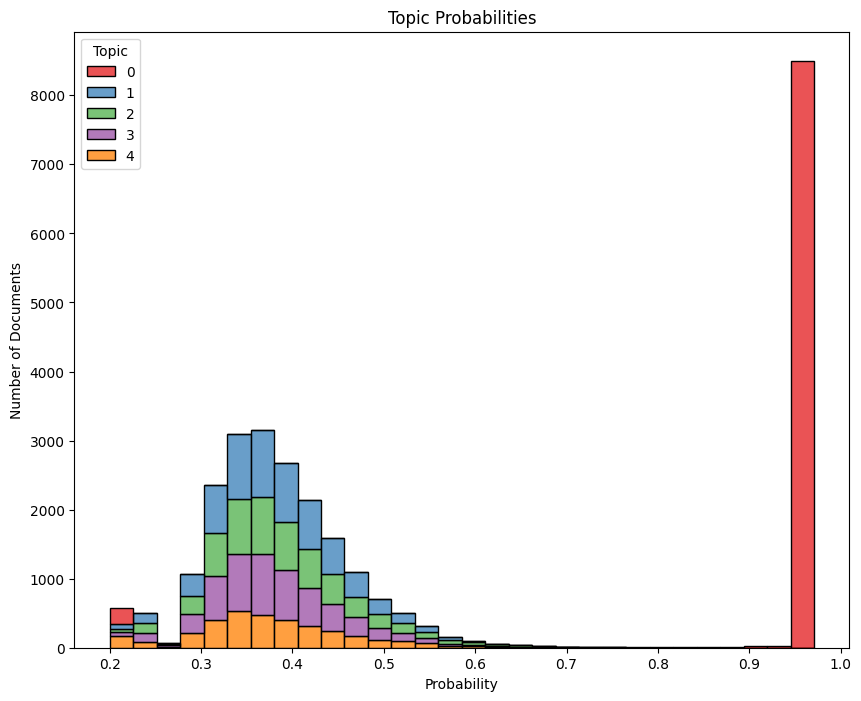

In [48]:
plt.figure(figsize=(10, 8))
num_topics = len(df['Topic'].unique())
cmap = plt.get_cmap('tab10', num_topics)  # Corrected method to get colormap
sns.histplot(df, x='TopicProbability', bins=30, kde=False, hue='Topic', palette=academic_palette, multiple='stack')
plt.title('Topic Probabilities')
plt.xlabel('Probability')
plt.ylabel('Number of Documents')
plt.savefig(f'{plots_dir}dominant_topics_dis_probabilities.png', bbox_inches='tight')  # Save as SVG
plt.show()

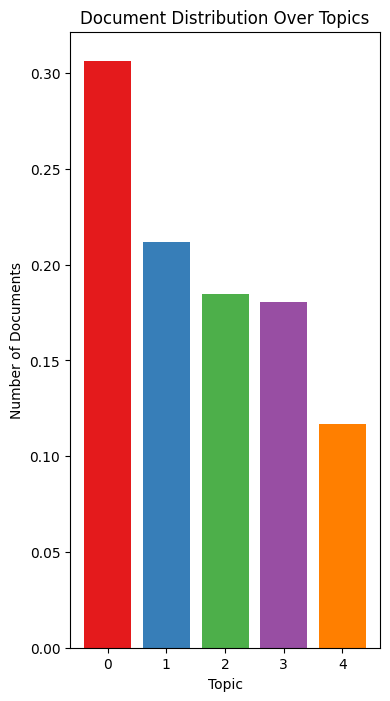

In [49]:
plt.figure(figsize=(4, 8))
plt.bar(topic_counts.index, topic_counts.values, color=academic_palette)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Document Distribution Over Topics')
plt.xticks(topic_counts.index)
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import FreqDist, bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [51]:
def analyze_topic(df, topic_number, academic_palette):
    texts = df[df['Topic'] == topic_number]['Text']

    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    data_vectorized = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=1, random_state=0)
    lda.fit(data_vectorized)

    def plot_top_words(model, feature_names, n_top_words, title):
        fig, ax = plt.subplots(figsize=(10, 5))
        topic = model.components_[0]
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax.barh(top_features, weights, height=0.7, color=academic_palette)
        ax.set_title(title, fontdict={'fontsize': 14})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        plt.savefig(f'{plots_dir}_Top words in Topic {topic_number}.png', bbox_inches='tight')
        plt.show()

    feature_names = vectorizer.get_feature_names_out()
    plot_top_words(lda, feature_names, 10, f'Top words in Topic {topic_number}')

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    stop_words = set(stopwords.words('english'))

    tokens = [word for text in texts for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

    freq_dist = FreqDist(tokens)


    bi_grams = list(bigrams(tokens))
    bi_gram_freq = FreqDist(bi_grams)
    most_common_bigrams = bi_gram_freq.most_common(20)


    bigram_labels = [bigram[0] for bigram in most_common_bigrams]
    bigram_frequencies = [bigram[1] for bigram in most_common_bigrams]
    

    bigram_labels = [str(bigram) for bigram in bigram_labels]
    

    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, bigram_frequencies, color=academic_palette)
    plt.xlabel('Frequency')
    plt.ylabel('Bi-Grams')
    plt.title(f'Most Common Bi-Grams in Topic {topic_number}')
    plt.gca().invert_yaxis()
    plt.savefig(f'{plots_dir}common_words_in_{topic_number}.pdf', bbox_inches='tight')
    plt.show()

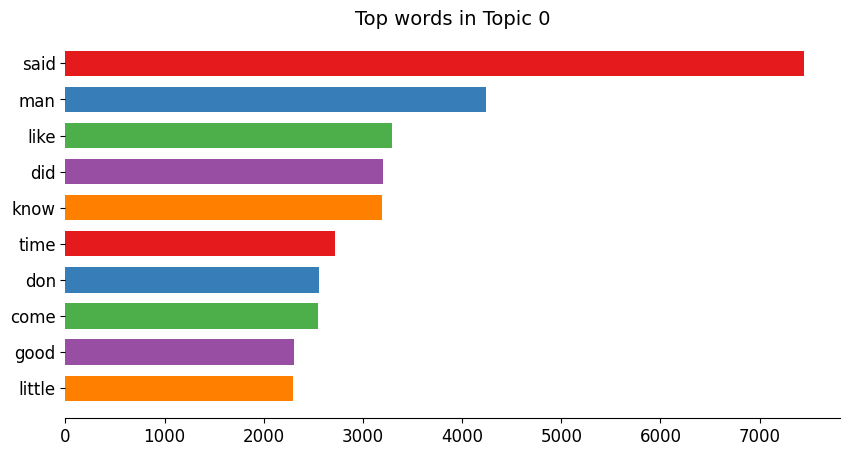

C:\Users\jacob\anaconda3\Lib\site-packages\fontTools\misc\py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


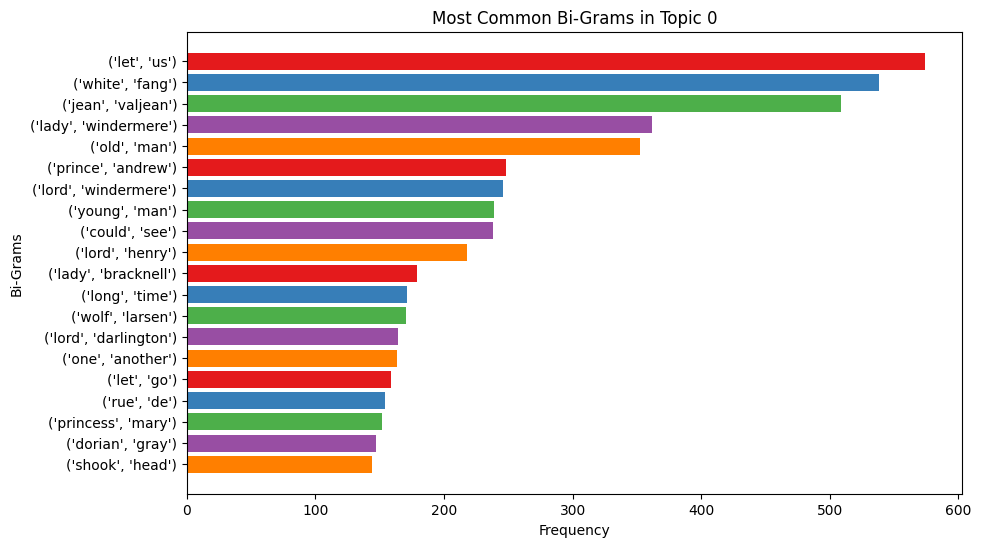

In [52]:
analyze_topic(df, 0, academic_palette)

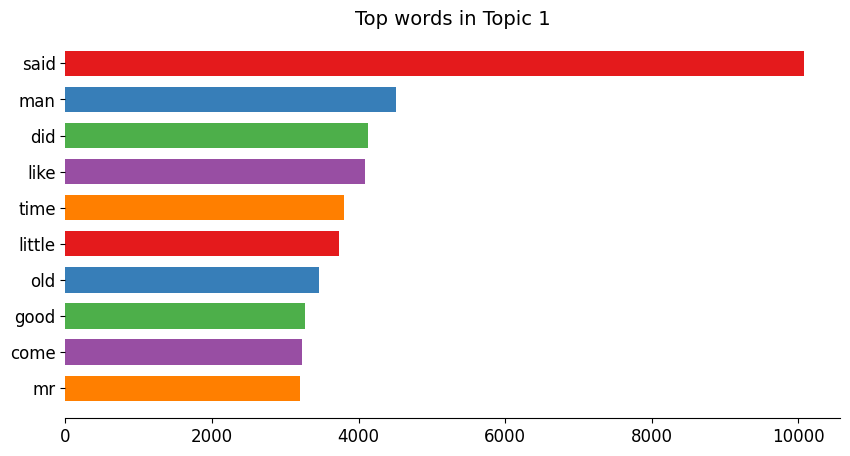

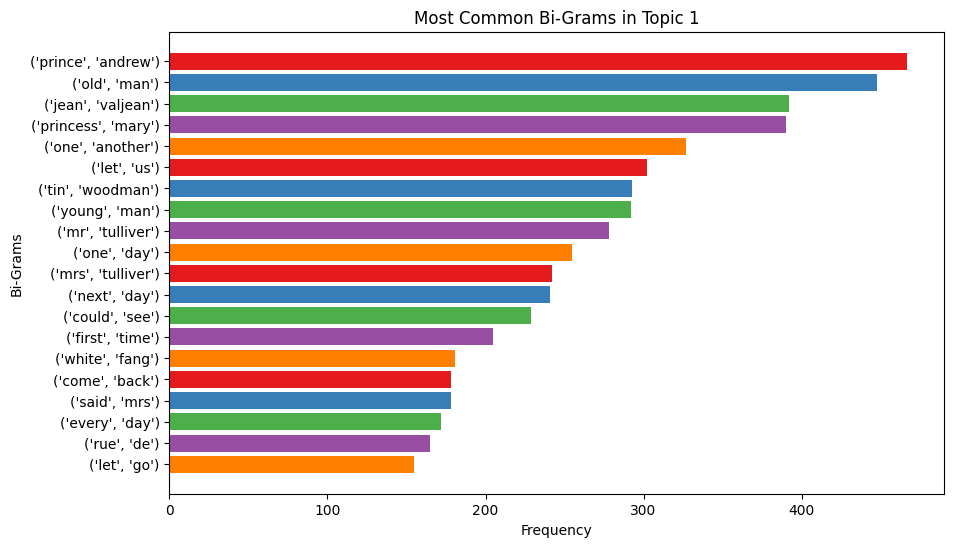

In [53]:
analyze_topic(df, 1, academic_palette)

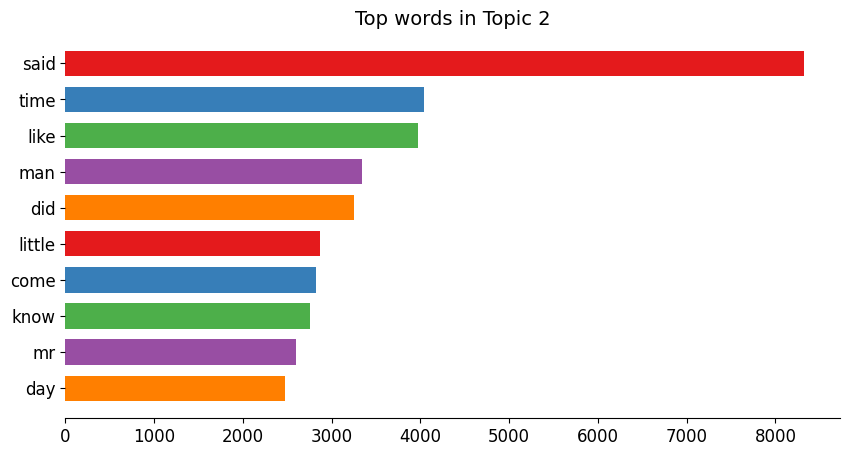

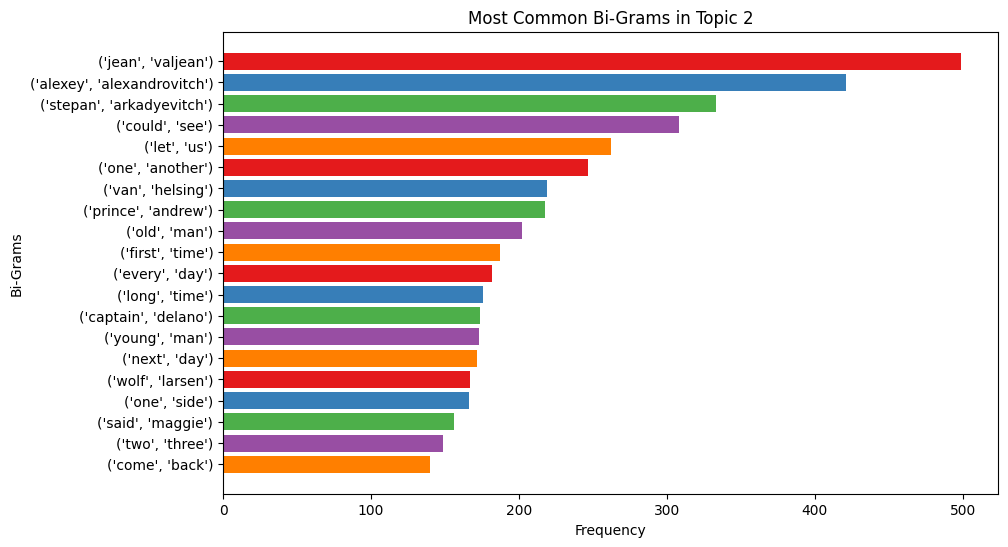

In [54]:
analyze_topic(df, 2, academic_palette)

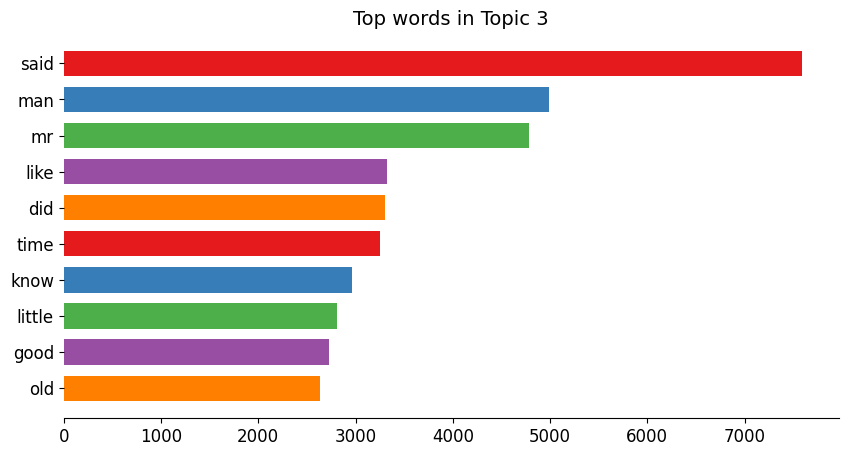

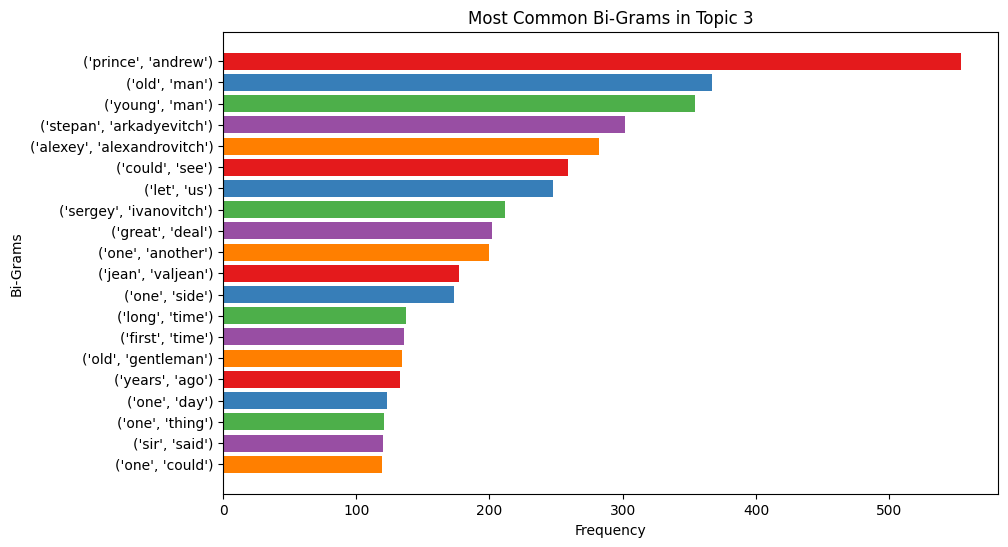

In [55]:
analyze_topic(df, 3, academic_palette)

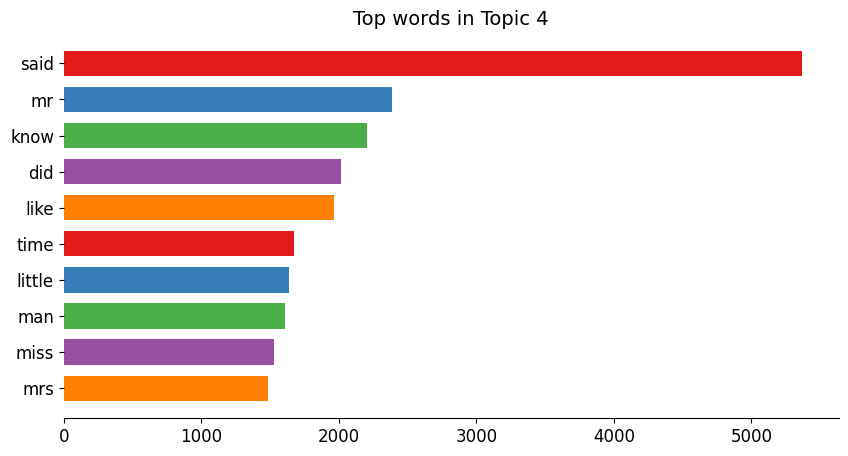

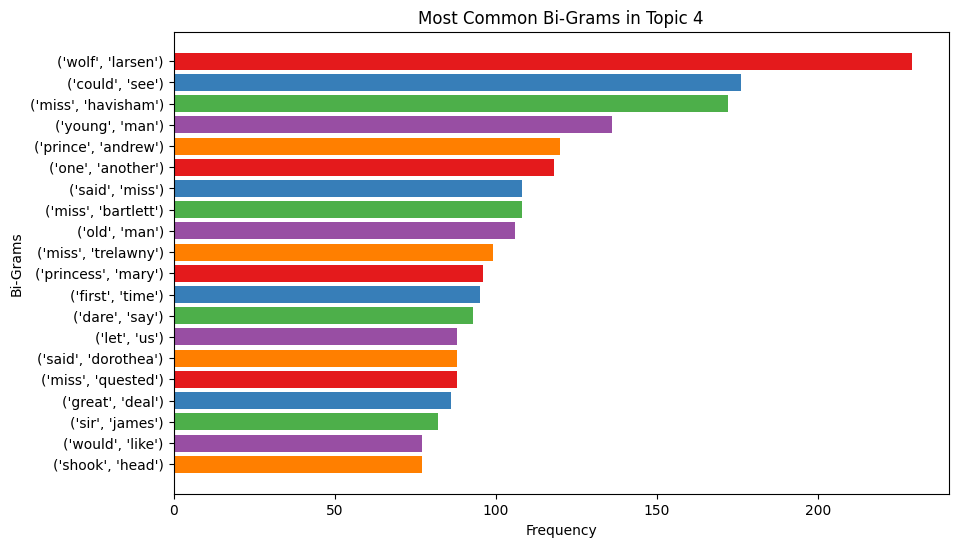

In [56]:
analyze_topic(df, 4, academic_palette)

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
topic_centroids = np.array([reduced_embeddings[df['Topic'] == i].mean(axis=0) for i in range(5)])
similarity_matrix = cosine_similarity(reduced_embeddings, topic_centroids)
most_representative = np.argsort(-similarity_matrix, axis=0)[:10]

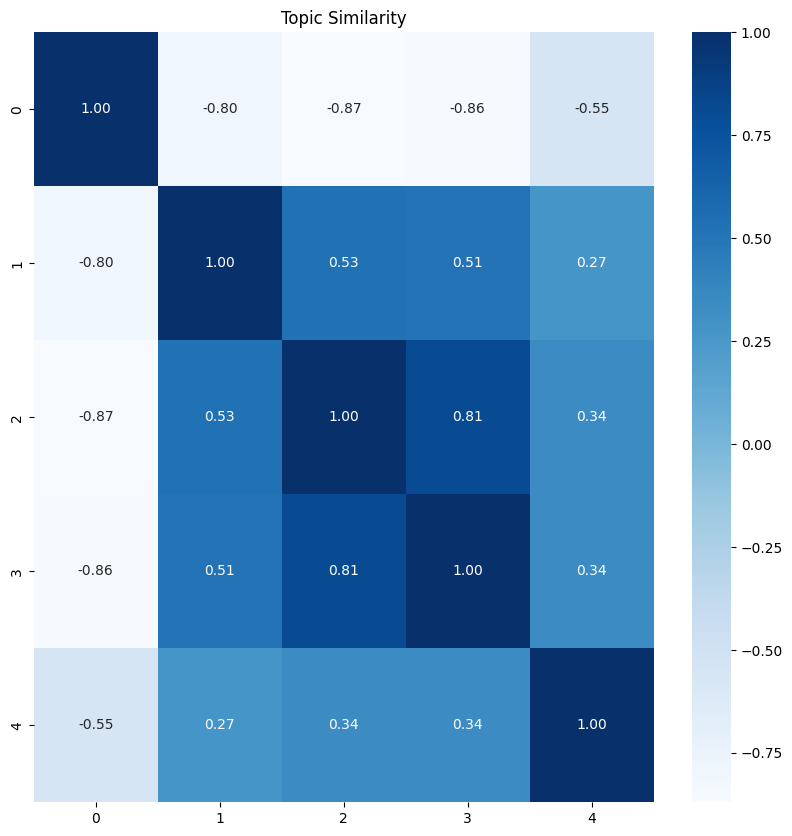

In [58]:
plt.figure(figsize=(10, 10))
topic_similarity = cosine_similarity(topic_centroids)
sns.heatmap(topic_similarity, annot=True, fmt=".2f", cmap='Blues')
plt.title('Topic Similarity')
plt.savefig(f'{plots_dir}topic_similarity.png', bbox_inches='tight')
plt.show()

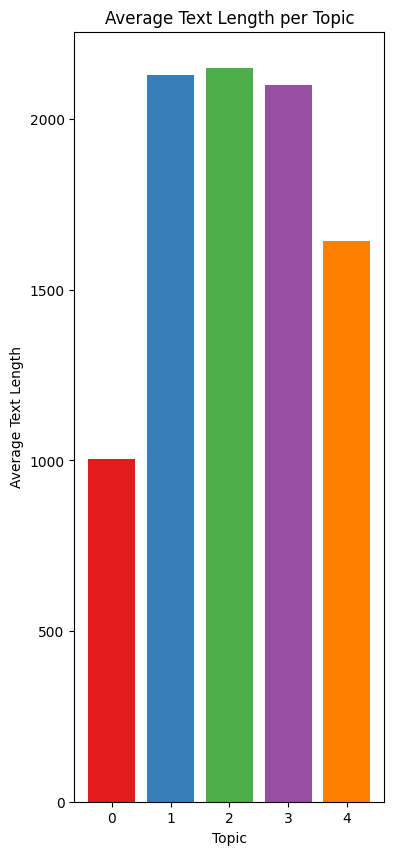

In [59]:
plt.figure(figsize=(4, 10))
df['TextLength'] = df['Text'].apply(len)
avg_length_per_topic = df.groupby('Topic')['TextLength'].mean()


plt.bar(range(5), avg_length_per_topic, color=academic_palette)
plt.xlabel('Topic')
plt.ylabel('Average Text Length')
plt.title('Average Text Length per Topic')
plt.show()

In [60]:
topic_book_distribution = df.groupby(['Book', 'Topic']).size().unstack(fill_value=0)

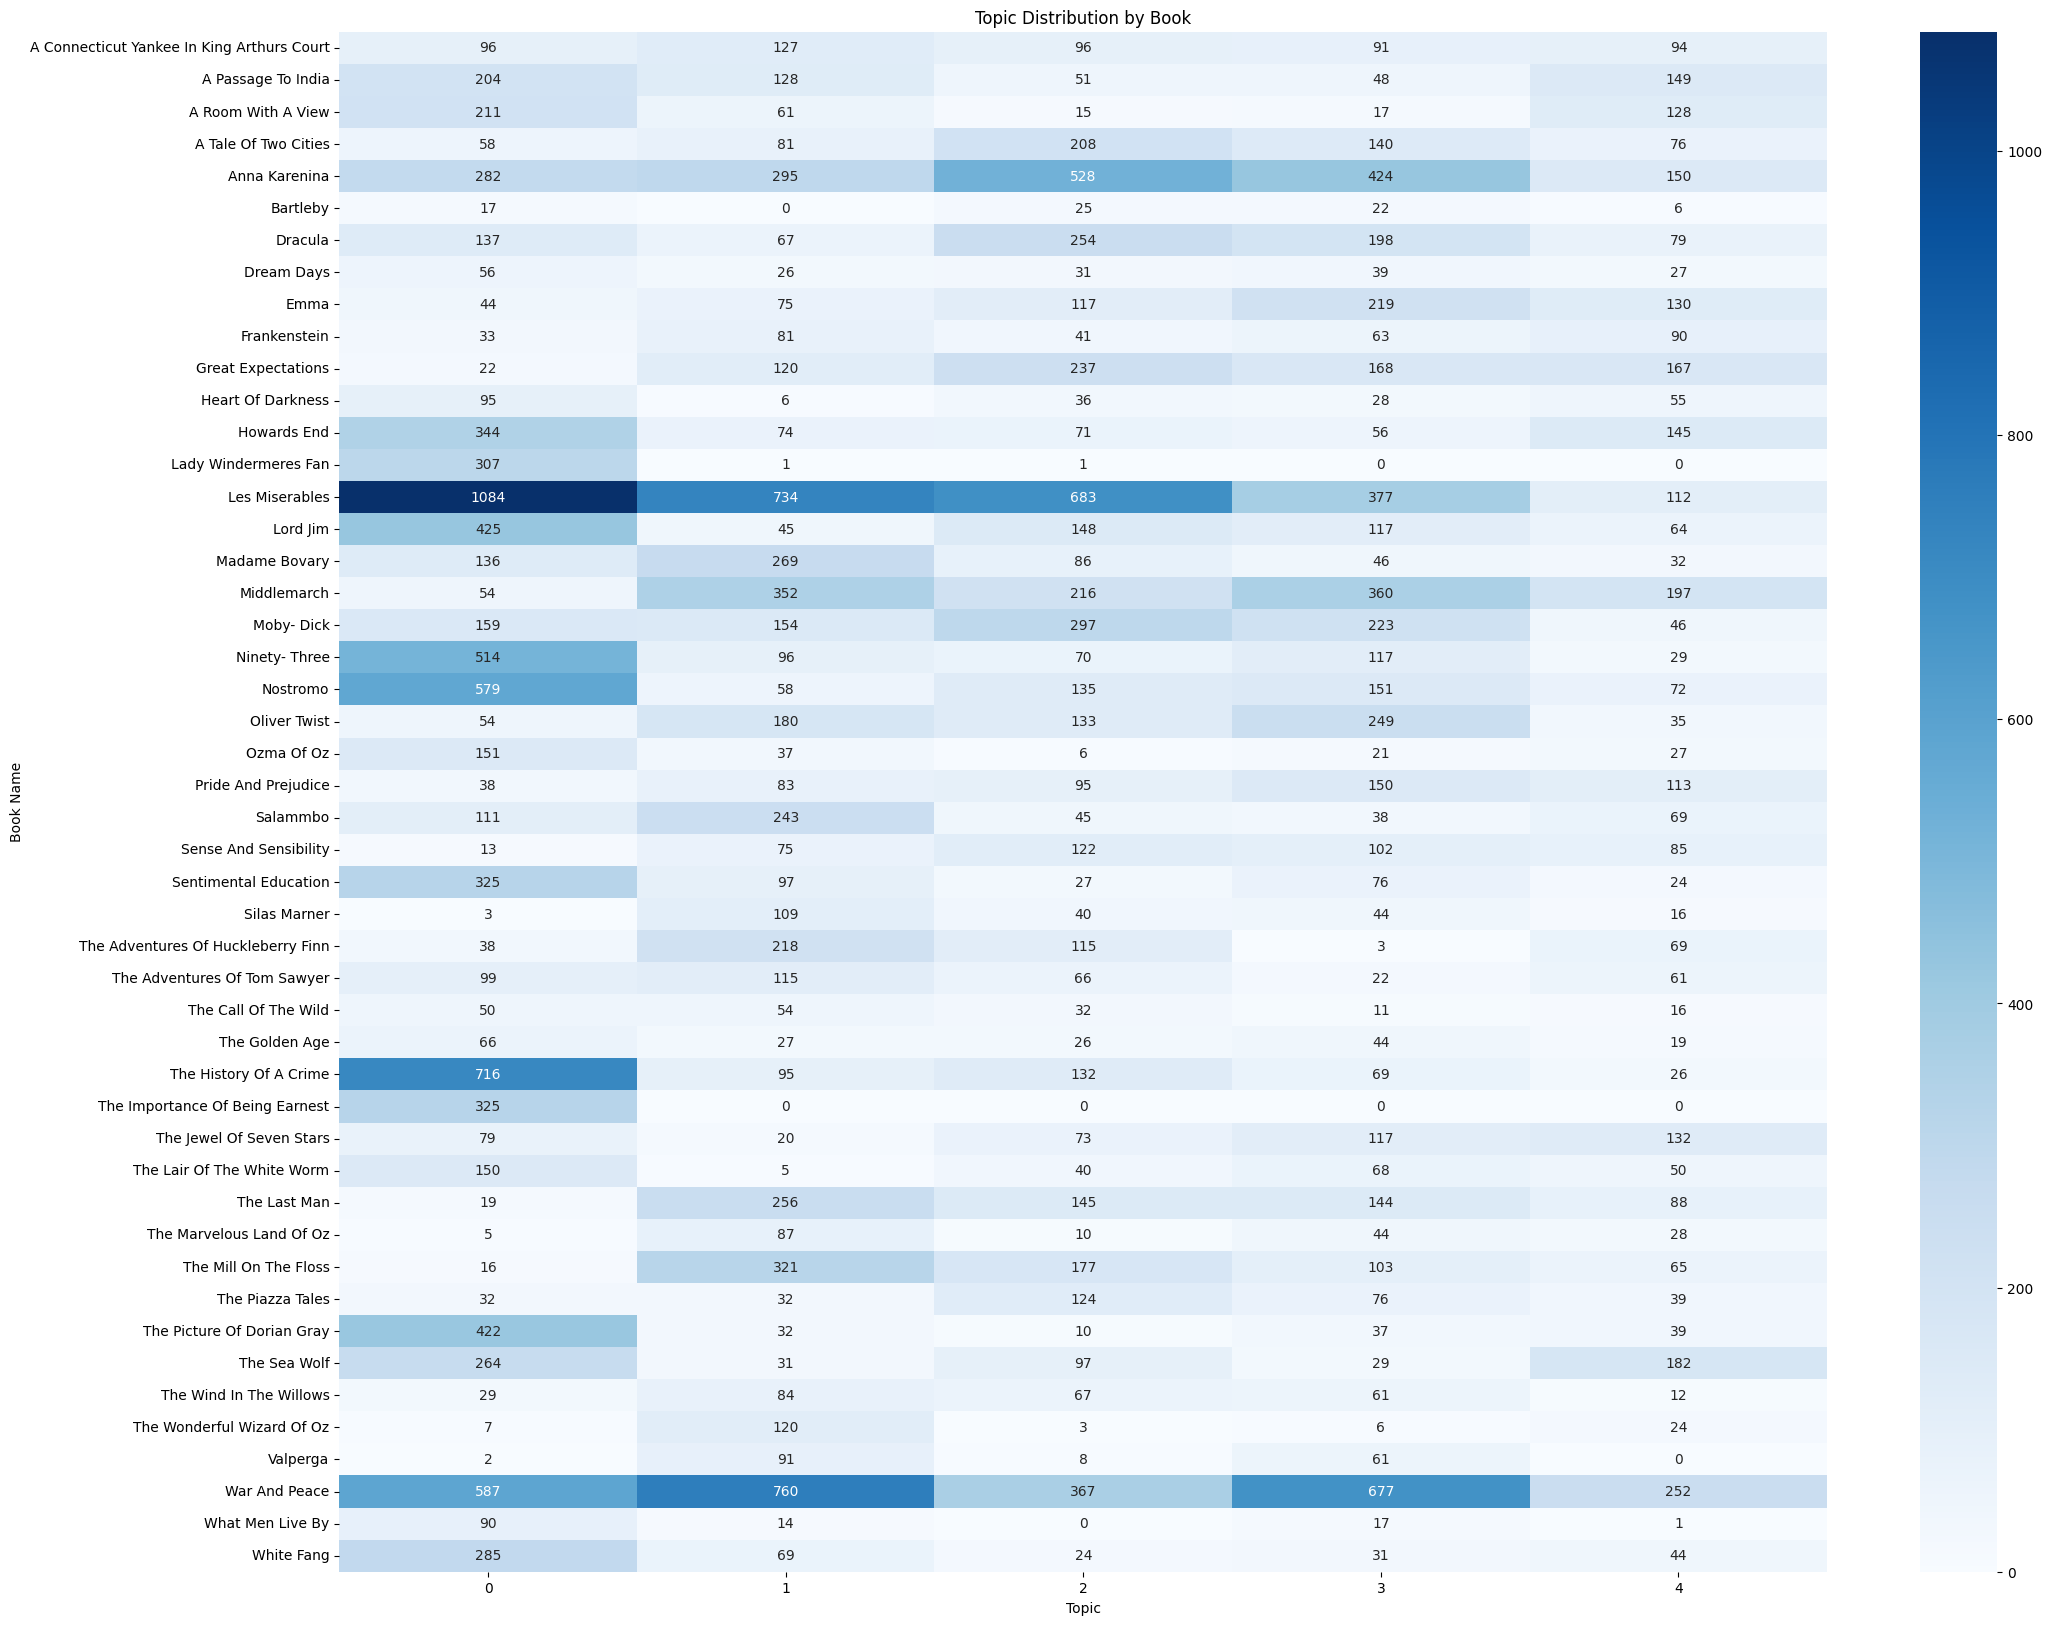

In [61]:
plt.figure(figsize=(24, 20))
sns.heatmap(topic_book_distribution, annot=True, cmap='Blues', fmt="d")
plt.title('Topic Distribution by Book')
plt.xlabel('Topic')
plt.ylabel('Book Name')
plt.show()

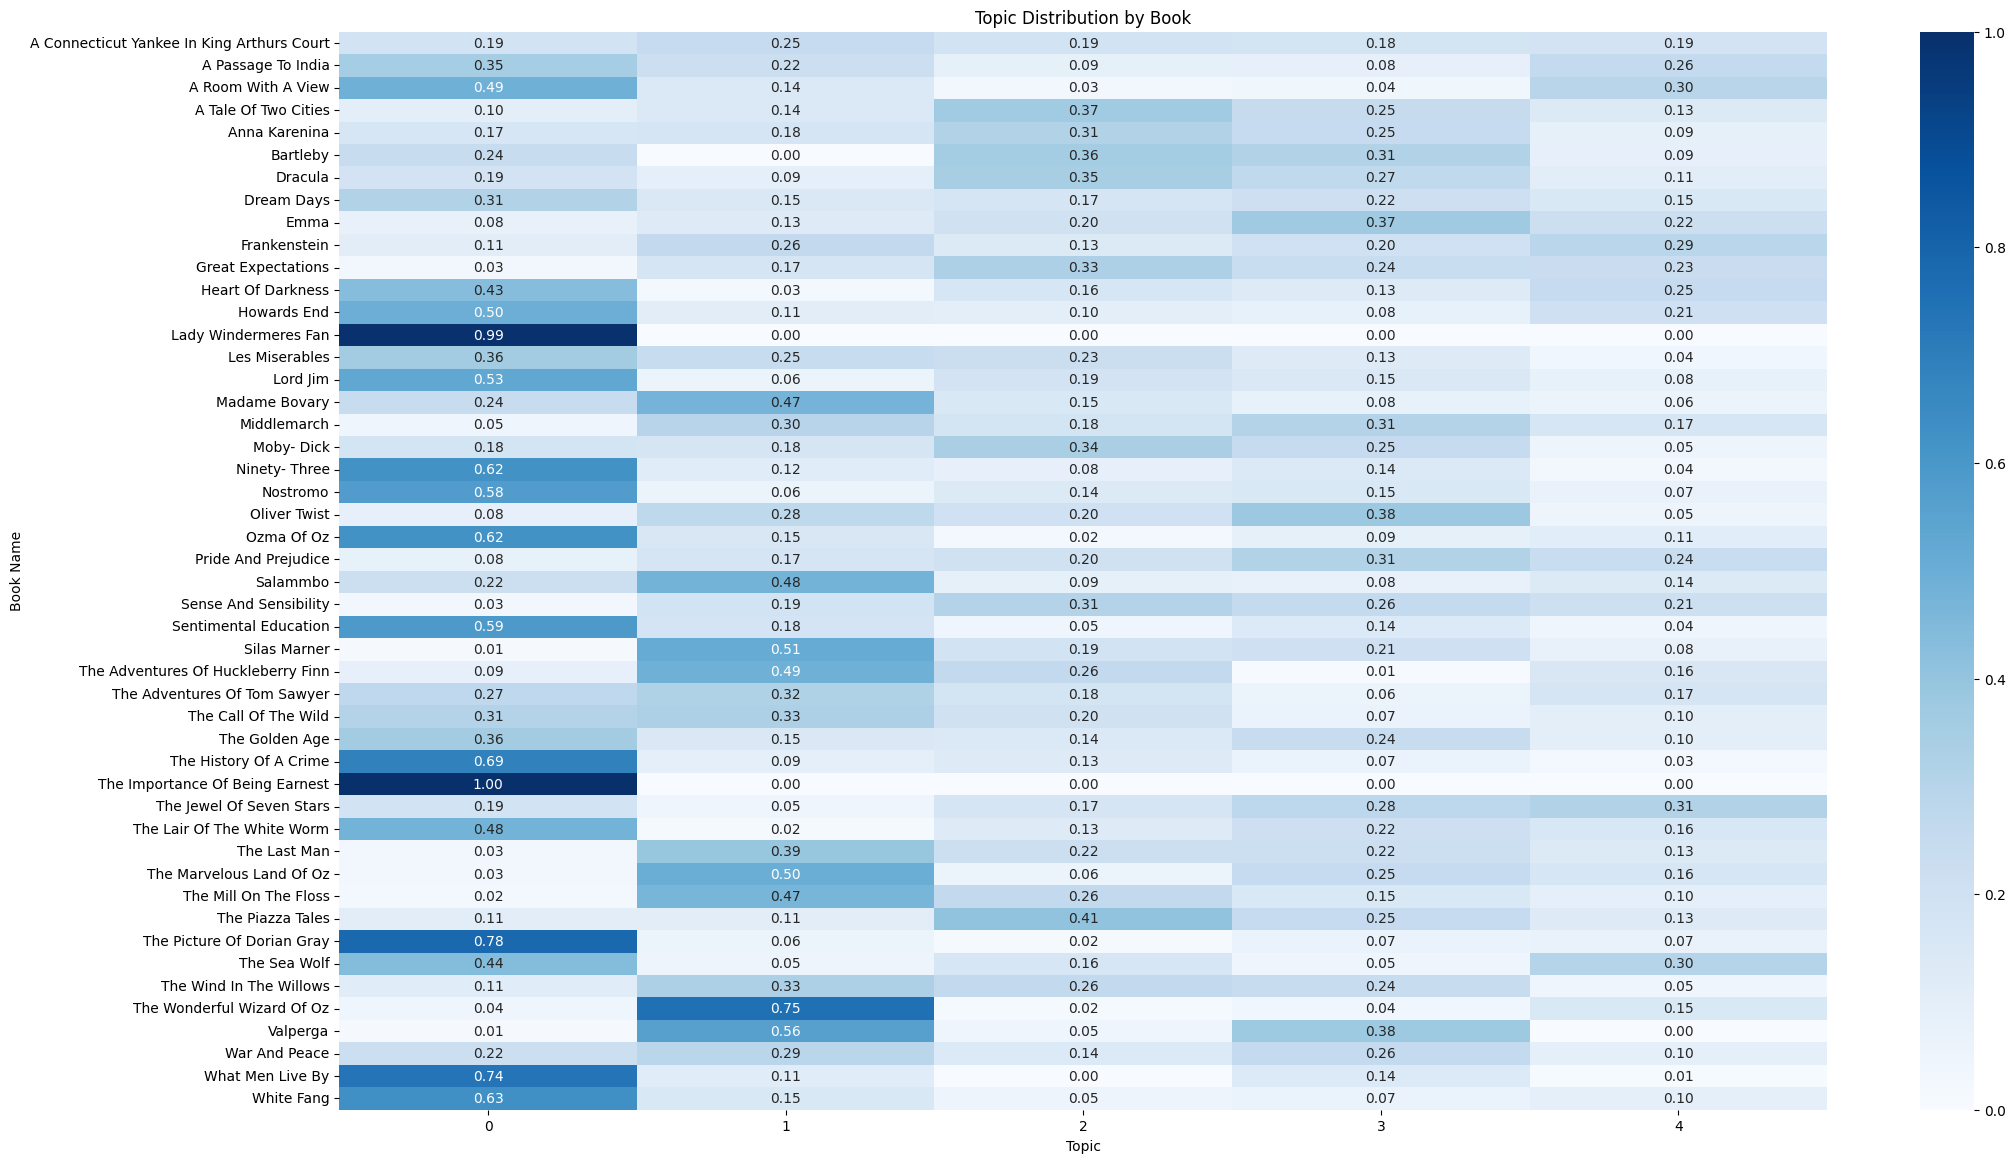

In [62]:
topic_book_distribution_normalized = topic_book_distribution.div(topic_book_distribution.sum(axis=1), axis=0)

plt.figure(figsize=(24, 14))
sns.heatmap(topic_book_distribution_normalized, annot=True, cmap='Blues', fmt=".2f")
plt.title('Topic Distribution by Book')
plt.xlabel('Topic')
plt.ylabel('Book Name')
plt.savefig(f'{plots_dir}topic_distribution_by_book.png', bbox_inches='tight')
plt.show()

In [63]:
author_topic_distribution = df.groupby(['Author', 'Topic']).size().unstack(fill_value=0)

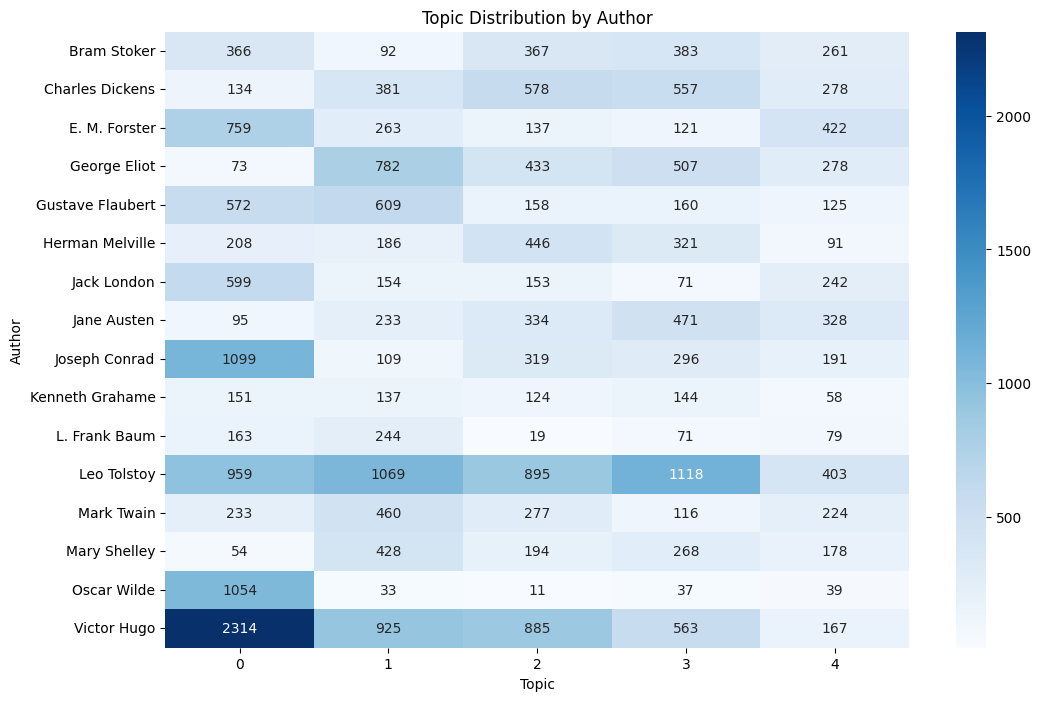

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(author_topic_distribution, annot=True, cmap='Blues', fmt="d")
plt.title('Topic Distribution by Author')
plt.xlabel('Topic')
plt.ylabel('Author')
plt.show()

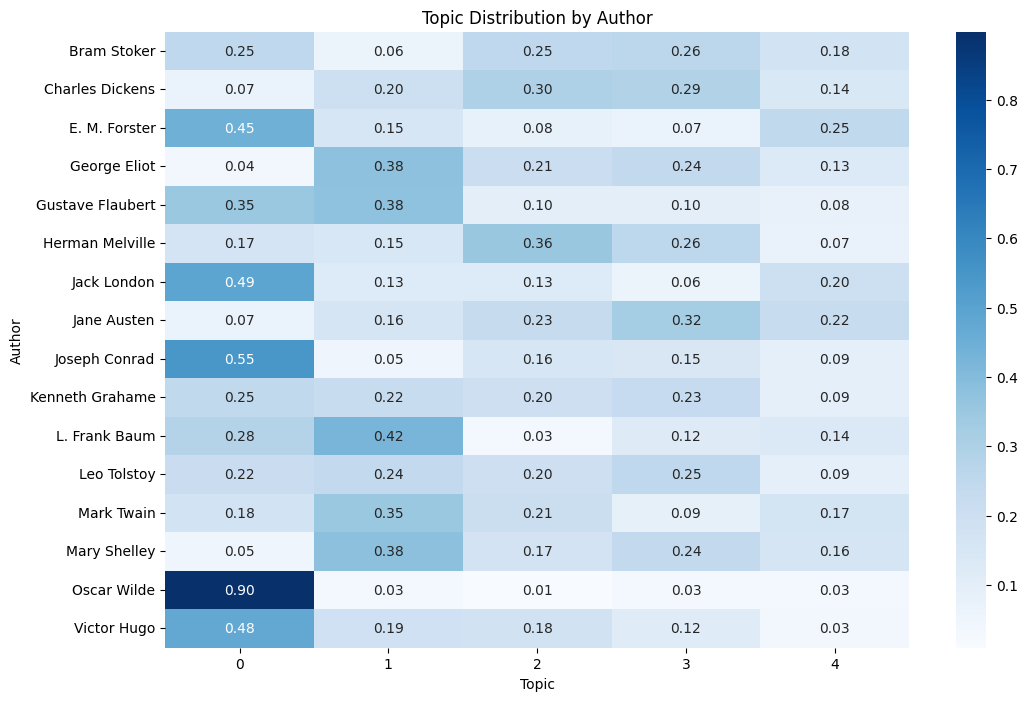

In [65]:
author_topic_distribution_normalized = author_topic_distribution.div(author_topic_distribution.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(author_topic_distribution_normalized, annot=True, cmap='Blues', fmt=".2f")
plt.title('Topic Distribution by Author')
plt.xlabel('Topic')
plt.ylabel('Author')
plt.savefig(f'{plots_dir}topic_distribution_by_author.png', bbox_inches='tight')
plt.show()

In [66]:
avg_length_per_topic = df.groupby('Topic')['TextLength'].mean()
avg_sentiment_per_topic = df.groupby('Topic')['Sentiment'].mean() 

print("Average Text Length per Topic:")
print(avg_length_per_topic)
print("\nAverage Sentiment per Topic:")
print(avg_sentiment_per_topic)

Average Text Length per Topic:
Topic
0    1003.414695
1    2129.674529
2    2148.655347
3    2099.758263
4    1643.619501
Name: TextLength, dtype: float64

Average Sentiment per Topic:
Topic
0    0.066457
1    0.087021
2    0.065094
3    0.105103
4    0.083459
Name: Sentiment, dtype: float64


In [67]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

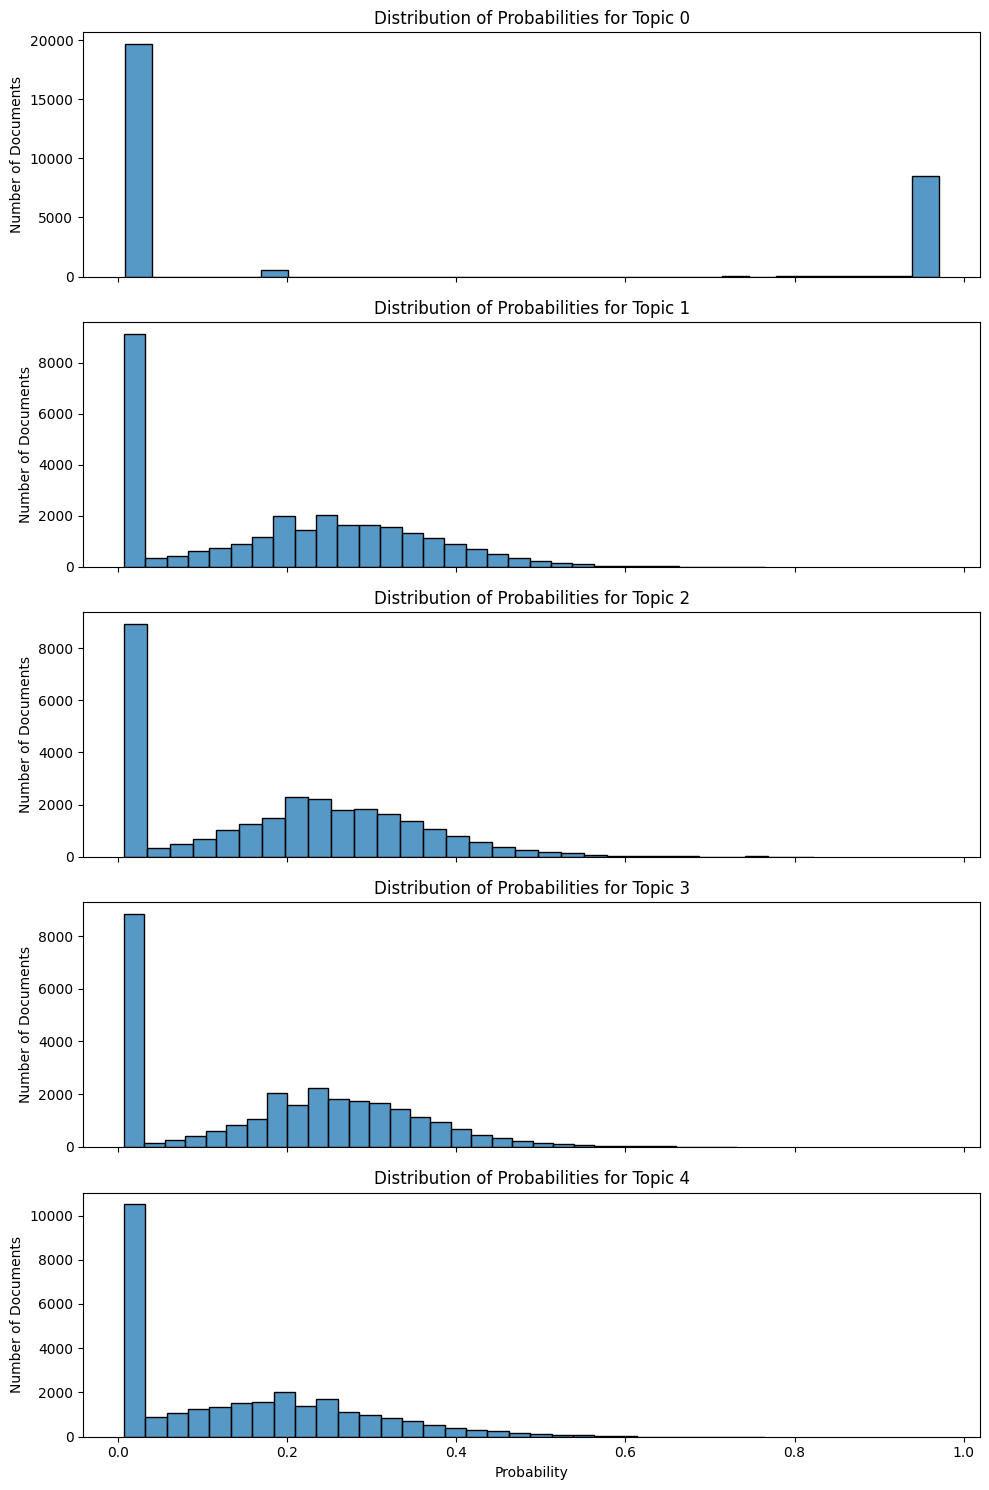

In [68]:
fig, axes = plt.subplots(nrows=lda.n_components, ncols=1, figsize=(10, 15), sharex=True)

for i, ax in enumerate(axes.flatten()):
    sns.histplot(topic_distribution[:, i], bins=30, kde=False, ax=ax)
    ax.set_title(f'Distribution of Probabilities for Topic {i}')
    ax.set_xlabel('Probability')
    ax.set_ylabel('Number of Documents')

plt.tight_layout()
plt.show()

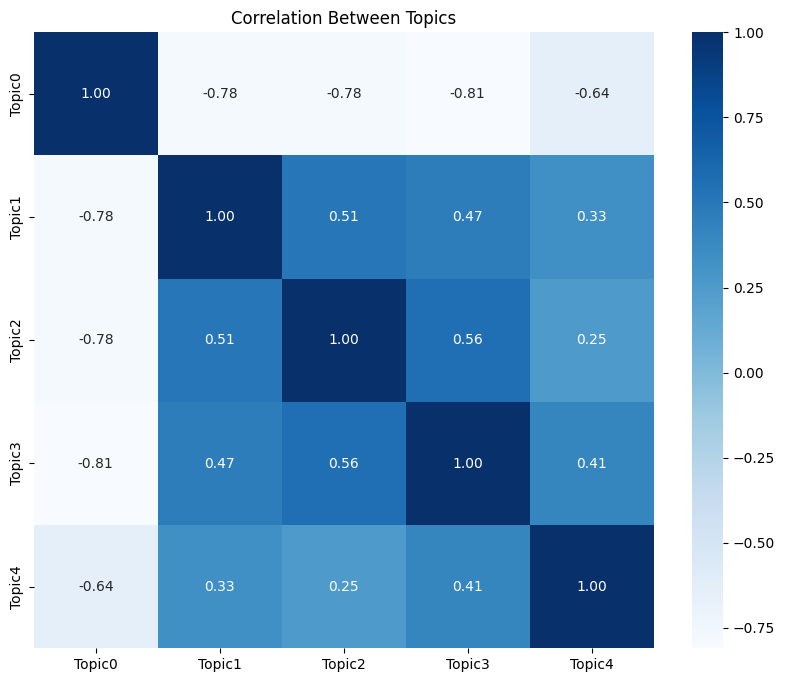

In [69]:
topic_prob_df = pd.DataFrame(data=topic_distribution, columns=[f'Topic{i}' for i in range(lda.n_components)])

correlation_matrix = topic_prob_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Topics')
plt.savefig(f'{plots_dir}correlation_between_topics.png', bbox_inches='tight')
plt.show()

In [70]:
for i in range(lda.n_components):
    top_docs_indices = np.argsort(-topic_distribution[:, i])[:5]  
    print(f"Top documents for Topic {i}:")
    for doc_index in top_docs_indices:
        print(f"- Document ID {doc_index}, Probability: {topic_distribution[doc_index, i]:.2f}")

Top documents for Topic 0:
- Document ID 19890, Probability: 0.97
- Document ID 19886, Probability: 0.97
- Document ID 19884, Probability: 0.97
- Document ID 19881, Probability: 0.97
- Document ID 19885, Probability: 0.97
Top documents for Topic 1:
- Document ID 19038, Probability: 0.76
- Document ID 7069, Probability: 0.73
- Document ID 20408, Probability: 0.67
- Document ID 23465, Probability: 0.66
- Document ID 19215, Probability: 0.66
Top documents for Topic 2:
- Document ID 24104, Probability: 0.82
- Document ID 11844, Probability: 0.78
- Document ID 10201, Probability: 0.77
- Document ID 8530, Probability: 0.76
- Document ID 15997, Probability: 0.76
Top documents for Topic 3:
- Document ID 13899, Probability: 0.73
- Document ID 27956, Probability: 0.72
- Document ID 13903, Probability: 0.71
- Document ID 13892, Probability: 0.69
- Document ID 5643, Probability: 0.69
Top documents for Topic 4:
- Document ID 589, Probability: 0.77
- Document ID 25415, Probability: 0.74
- Document I

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['Text'])
vocabulary = vectorizer.get_feature_names_out()

In [72]:
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=0)

In [73]:
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_words[topic_idx] = top_features
    return top_words

In [74]:
top_words = get_top_words(lda, vocabulary, 10)